<a href="https://colab.research.google.com/github/RRM2021/Support_development_plans/blob/main/MODELO_EC_GUARNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PLAN DE DESARROLLO 2024 - 2027 MUNICIPIO DE GUARNE - ANTIOQUIA

APOYO TÉCNICO CON CIENCIA DE DATOS

RICARDO RAMÍREZ - INGENIERO CIENTÍFICO DE DATOS

ETL EXTRACT, TRANSFORM, LOAD

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.colab import files

# This will prompt you to upload the file from your local machine
uploaded = files.upload()

# Assuming you uploaded a file named 'your_file.csv'
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")


Saving anex-IPC-Variacion-jun2024.xlsx to anex-IPC-Variacion-jun2024.xlsx
Uploaded file: anex-IPC-Variacion-jun2024.xlsx


In [ ]:
# Open Excel file uploaded
import pandas as pd
df_ipc = pd.read_excel(file_name, sheet_name="Datos")
df_ipc.head()

,Año,DeflatorIndex
0,2003,0.370088
1,2004,0.390443
2,2005,0.409380
3,2006,0.427720
4,2007,0.452057


In [ ]:
# Convert the 'Año' column to datetime, specifying the format
df_ipc['Año'] = pd.to_datetime(df_ipc['Año'], format='%Y')
df_ipc.head()

,Año,DeflatorIndex
0,2003-01-01,0.370088
1,2004-01-01,0.390443
2,2005-01-01,0.409380
3,2006-01-01,0.427720
4,2007-01-01,0.452057


In [ ]:
df_ipc.dtypes

Año              datetime64[ns]
DeflatorIndex           float64
dtype: object

In [ ]:
from google.colab import files

# This will prompt you to upload the file from your local machine
uploaded = files.upload()

# Assuming you uploaded a file named 'your_file.csv'
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")


Saving TerriData_Dim12.xlsx to TerriData_Dim12.xlsx
Uploaded file: TerriData_Dim12.xlsx


In [ ]:
# Open Excel file uploaded
import pandas as pd
df = pd.read_excel(file_name, sheet_name="Datos")
df.head()

,Código Entidad,Entidad,Indicador,Dato Numérico,Año,Mes,Unidad de Medida
0,5318,Guarne,Valor agregado,540.91,2011,12,Miles de millones de pesos corrientes
1,5318,Guarne,Valor agregado,561.64,2012,12,Miles de millones de pesos corrientes
2,5318,Guarne,Valor agregado,598.40,2013,12,Miles de millones de pesos corrientes
3,5318,Guarne,Valor agregado,994.03,2014,12,Miles de millones de pesos corrientes
4,5318,Guarne,Valor agregado,1027.54,2015,12,Miles de millones de pesos corrientes


In [ ]:
df.dtypes

Código Entidad        int64
Entidad              object
Indicador            object
Dato Numérico       float64
Año                   int64
Mes                   int64
Unidad de Medida     object
dtype: object

In [ ]:
# Convert the 'Año' column to datetime, specifying the format
df['Año'] = pd.to_datetime(df['Año'], format='%Y')

# Sort the DataFrame by the 'Año' column
df = df.sort_values(by='Año')

# Rearrange the columns for time series analysis
df = df[['Año', 'Indicador', 'Dato Numérico']]

df.head()

,Año,Indicador,Dato Numérico
0,2011-01-01,Valor agregado,540.91
22,2011-01-01,Valor agregado por actividades económicas - Ac...,15.89
33,2011-01-01,Valor agregado por actividades económicas - Ac...,219.04
44,2011-01-01,Valor agregado por actividades económicas - Ac...,305.99
11,2011-01-01,Valor agregado per cápita,11147349.14


In [ ]:
df.dtypes

Año              datetime64[ns]
Indicador                object
Dato Numérico           float64
dtype: object

In [ ]:
try:
    import pyspark
    print("PySpark is already installed.")
except ImportError:
    print("PySpark is not installed. Installing now...")
    !pip install pyspark
    print("PySpark installation complete.")


PySpark is not installed. Installing now...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=4d09d59ab7247a3573069011190ef02dd4b35423587110dd8610d6c15391e756
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
PySpark installation complete.


In [ ]:
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [ ]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

In [ ]:
# Convert Pandas DataFrame to PySpark DataFrame
pydf = spark.createDataFrame(df)
# Step 5: Verify the conversion

pydf.createOrReplaceTempView("economia")

# Show DataFrame
pydf.show()

+-------------------+--------------------+-------------+
|                Año|           Indicador|Dato Numérico|
+-------------------+--------------------+-------------+
|2011-01-01 00:00:00|      Valor agregado|       540.91|
|2011-01-01 00:00:00|Valor agregado po...|        15.89|
|2011-01-01 00:00:00|Valor agregado po...|       219.04|
|2011-01-01 00:00:00|Valor agregado po...|       305.99|
|2011-01-01 00:00:00|Valor agregado pe...|1.114734914E7|
|2012-01-01 00:00:00|      Valor agregado|       561.64|
|2012-01-01 00:00:00|Valor agregado po...|        23.06|
|2012-01-01 00:00:00|Valor agregado po...|       263.08|
|2012-01-01 00:00:00|Valor agregado pe...|1.137946136E7|
|2012-01-01 00:00:00|Valor agregado po...|        275.5|
|2013-01-01 00:00:00|Valor agregado po...|        35.68|
|2013-01-01 00:00:00|Valor agregado po...|       238.48|
|2013-01-01 00:00:00|Valor agregado pe...|1.193877117E7|
|2013-01-01 00:00:00|      Valor agregado|        598.4|
|2013-01-01 00:00:00|Valor agre

In [ ]:
# Convert Pandas DataFrame to PySpark DataFrame
pydf_ipc = spark.createDataFrame(df_ipc)
# Step 5: Verify the conversion

pydf_ipc.createOrReplaceTempView("ipc")

# Show DataFrame
pydf_ipc.show()

+-------------------+-------------------+
|                Año|      DeflatorIndex|
+-------------------+-------------------+
|2003-01-01 00:00:00| 0.3700884962819772|
|2004-01-01 00:00:00|0.39044336357748594|
|2005-01-01 00:00:00|0.40937986671099397|
|2006-01-01 00:00:00| 0.4277200847396465|
|2007-01-01 00:00:00|0.45205735756133236|
|2008-01-01 00:00:00|0.48673015688628657|
|2009-01-01 00:00:00| 0.4964647600240123|
|2010-01-01 00:00:00| 0.5122026929167734|
|2011-01-01 00:00:00| 0.5313078533625692|
|2012-01-01 00:00:00| 0.5442717649846158|
|2013-01-01 00:00:00| 0.5548306372253174|
|2014-01-01 00:00:00|  0.575137438547764|
|2015-01-01 00:00:00| 0.6140742431374477|
|2016-01-01 00:00:00| 0.6493835121178511|
|2017-01-01 00:00:00| 0.6759432977634711|
|2018-01-01 00:00:00| 0.6974382946323495|
|2019-01-01 00:00:00| 0.7239409498283789|
|2020-01-01 00:00:00| 0.7355963991206157|
|2021-01-01 00:00:00| 0.7769369167511944|
|2022-01-01 00:00:00|  0.878871040228951|
+-------------------+-------------

In [ ]:
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder.appName("Deflating Values").getOrCreate()

# Join the DataFrames on 'Año'
joined_df = pydf.join(pydf_ipc, on='Año', how='inner')

# Calculate deflated values
deflated_df = joined_df.withColumn('Dato Numérico Deflacted', col('Dato Numérico') / col('DeflatorIndex'))

# Select the relevant columns and rename 'Dato Numérico Deflacted' to 'Dato Numérico'
result_df = deflated_df.select(
    col('Año'),
    col('Indicador'),
    col('Dato Numérico Deflacted').alias('Dato Numérico')
)

result_df.createOrReplaceTempView("economia_d")

# Show DataFrame
result_df.show()

+-------------------+--------------------+--------------------+
|                Año|           Indicador|       Dato Numérico|
+-------------------+--------------------+--------------------+
|2011-01-01 00:00:00|      Valor agregado|  1018.0726608437277|
|2011-01-01 00:00:00|Valor agregado po...|   29.90733131353984|
|2011-01-01 00:00:00|Valor agregado po...|     412.26569231704|
|2011-01-01 00:00:00|Valor agregado po...|    575.918458692892|
|2011-01-01 00:00:00|Valor agregado pe...|2.0980960604007766E7|
|2012-01-01 00:00:00|      Valor agregado|  1031.9109609073237|
|2012-01-01 00:00:00|Valor agregado po...|  42.368539916179195|
|2012-01-01 00:00:00|Valor agregado po...|   483.3614692605561|
|2012-01-01 00:00:00|Valor agregado pe...| 2.090768269105719E7|
|2012-01-01 00:00:00|Valor agregado po...|  506.18095173058845|
|2013-01-01 00:00:00|Valor agregado po...|   64.30791237202409|
|2013-01-01 00:00:00|Valor agregado po...|  429.82485825337176|
|2013-01-01 00:00:00|Valor agregado pe..

In [ ]:
from google.colab import files

# This will prompt you to upload the file from your local machine
uploaded = files.upload()

# Assuming you uploaded a file named 'your_file.csv'
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")

Saving TerriData_Dim16.xlsx to TerriData_Dim16.xlsx
Uploaded file: TerriData_Dim16.xlsx


In [ ]:
# Open Excel file uploaded
import pandas as pd
df_lab = pd.read_excel(file_name, sheet_name="Datos (2)")
df_lab.head()

,Código Entidad,Entidad,Indicador,Dato Numérico,Año,Unidad de Medida
0,5318,Guarne,Trabajadores cotizantes - Hombres,2280.00,2009,Trabajadores
1,5318,Guarne,Trabajadores cotizantes - Hombres,2659.67,2010,Trabajadores
2,5318,Guarne,Trabajadores cotizantes - Hombres,2796.00,2011,Trabajadores
3,5318,Guarne,Trabajadores cotizantes - Hombres,2480.92,2012,Trabajadores
4,5318,Guarne,Trabajadores cotizantes - Hombres,2715.83,2013,Trabajadores


In [ ]:
# Convert the 'Año' column to datetime, specifying the format
df_lab['Año'] = pd.to_datetime(df_lab['Año'], format='%Y')

# Sort the DataFrame by the 'Año' column
df_lab = df_lab.sort_values(by='Año')

# Rearrange the columns for time series analysis
df_lab = df_lab[['Año', 'Indicador', 'Dato Numérico']]

# Convert Pandas DataFrame to PySpark DataFrame
pydf_lab = spark.createDataFrame(df_lab)
# Step 5: Verify the conversion
#pydf.show()

pydf_lab.createOrReplaceTempView("laboral")

pydf_lab.show()

+-------------------+--------------------+-------------+
|                Año|           Indicador|Dato Numérico|
+-------------------+--------------------+-------------+
|2009-01-01 00:00:00|Trabajadores coti...|       2280.0|
|2009-01-01 00:00:00|Trabajadores coti...|      1383.17|
|2010-01-01 00:00:00|Número de empresa...|       176.24|
|2010-01-01 00:00:00|Trabajadores coti...|      1523.75|
|2010-01-01 00:00:00|Porcentaje de per...|        16.46|
|2010-01-01 00:00:00|Trabajadores coti...|      2659.67|
|2011-01-01 00:00:00|Trabajadores coti...|       1685.5|
|2011-01-01 00:00:00|Trabajadores coti...|       2796.0|
|2011-01-01 00:00:00|Porcentaje de per...|        17.16|
|2011-01-01 00:00:00|Número de empresa...|       195.69|
|2012-01-01 00:00:00|Trabajadores coti...|      2480.92|
|2012-01-01 00:00:00|Número de empresa...|       211.92|
|2012-01-01 00:00:00|Trabajadores coti...|      1470.17|
|2012-01-01 00:00:00|Porcentaje de per...|        14.65|
|2013-01-01 00:00:00|Número de 

In [ ]:
from google.colab import files

# This will prompt you to upload the file from your local machine
uploaded = files.upload()

# Assuming you uploaded a file named 'your_file.csv'
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")

Saving Copia de TerriData_Dim7_Sub1_Var3.xlsx to Copia de TerriData_Dim7_Sub1_Var3.xlsx
Uploaded file: Copia de TerriData_Dim7_Sub1_Var3.xlsx


In [ ]:
# Open Excel file uploaded
import pandas as pd
df_trib = pd.read_excel(file_name, sheet_name="Datos")
df_trib.head()

,Código Entidad,Entidad,Indicador,Dato Numérico,Dato Cualitativo,Año,Unidad de Medida
0,5318,Guarne,Ingresos tributarios,2810.92,NaN,2000,Millones de pesos corrientes
1,5318,Guarne,Ingresos tributarios,2690.58,NaN,2001,Millones de pesos corrientes
2,5318,Guarne,Ingresos tributarios,2960.15,NaN,2002,Millones de pesos corrientes
3,5318,Guarne,Ingresos tributarios,2685.51,NaN,2003,Millones de pesos corrientes
4,5318,Guarne,Ingresos tributarios,3270.02,NaN,2004,Millones de pesos corrientes


In [ ]:
# Convert the 'Año' column to datetime, specifying the format
df_trib['Año'] = pd.to_datetime(df_trib['Año'], format='%Y')
# Sort the DataFrame by the 'Año' column
df_trib = df_trib.sort_values(by='Año')
# Rearrange the columns for time series analysis
df_trib = df_trib[['Año', 'Indicador', 'Dato Numérico']]
# Convert Pandas DataFrame to PySpark DataFrame
pydf_trib = spark.createDataFrame(df_trib)
pydf_trib.createOrReplaceTempView("tributaria")
pydf_trib.show()

+-------------------+--------------------+-------------+
|                Año|           Indicador|Dato Numérico|
+-------------------+--------------------+-------------+
|2000-01-01 00:00:00|Ingresos tributarios|      2810.92|
|2001-01-01 00:00:00|Ingresos tributarios|      2690.58|
|2002-01-01 00:00:00|Ingresos tributarios|      2960.15|
|2003-01-01 00:00:00|Ingresos tributarios|      2685.51|
|2004-01-01 00:00:00|Ingresos tributarios|      3270.02|
|2005-01-01 00:00:00|Ingresos tributarios|      3720.27|
|2006-01-01 00:00:00|Ingresos tributarios|      3840.66|
|2007-01-01 00:00:00|Ingresos tributarios|      4972.76|
|2008-01-01 00:00:00|Ingresos tributarios|      5378.43|
|2009-01-01 00:00:00|Ingresos tributarios|      8379.21|
|2010-01-01 00:00:00|Ingresos tributarios|      9176.79|
|2011-01-01 00:00:00|Ingresos tributarios|      8563.11|
|2012-01-01 00:00:00|Ingresos tributarios|      11628.2|
|2013-01-01 00:00:00|Ingresos tributarios|     15304.65|
|2014-01-01 00:00:00|Ingresos t

In [ ]:
# Join the DataFrames on 'Año'
joined_df_trib = pydf_trib.join(pydf_ipc, on='Año', how='inner')

# Calculate deflated values
deflated_df = joined_df_trib.withColumn('Dato Numérico Deflacted', col('Dato Numérico') / col('DeflatorIndex'))

# Select the relevant columns and rename 'Dato Numérico Deflacted' to 'Dato Numérico'
result_df_trib = deflated_df.select(
    col('Año'),
    col('Indicador'),
    col('Dato Numérico Deflacted').alias('Dato Numérico')
)

result_df_trib.createOrReplaceTempView("tributaria_d")

# Show DataFrame
result_df_trib.show()

+-------------------+--------------------+------------------+
|                Año|           Indicador|     Dato Numérico|
+-------------------+--------------------+------------------+
|2003-01-01 00:00:00|Ingresos tributarios| 7256.399555726425|
|2004-01-01 00:00:00|Ingresos tributarios| 8375.145552579084|
|2005-01-01 00:00:00|Ingresos tributarios| 9087.574408309541|
|2006-01-01 00:00:00|Ingresos tributarios| 8979.377254023066|
|2007-01-01 00:00:00|Ingresos tributarios|11000.285509843354|
|2008-01-01 00:00:00|Ingresos tributarios|11050.126900718313|
|2009-01-01 00:00:00|Ingresos tributarios|16877.753820018817|
|2010-01-01 00:00:00|Ingresos tributarios|17916.325171470966|
|2011-01-01 00:00:00|Ingresos tributarios|16117.040141238902|
|2012-01-01 00:00:00|Ingresos tributarios| 21364.69452963205|
|2013-01-01 00:00:00|Ingresos tributarios|27584.363539363745|
|2014-01-01 00:00:00|Ingresos tributarios|32059.084949429405|
|2015-01-01 00:00:00|Ingresos tributarios|  43669.6544427409|
|2016-01

In [ ]:
from google.colab import files

# This will prompt you to upload the file from your local machine
uploaded = files.upload()

# Assuming you uploaded a file named 'your_file.csv'
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")

Saving Copia de TerriData_Dim7_Sub1_Var21.xlsx to Copia de TerriData_Dim7_Sub1_Var21.xlsx
Uploaded file: Copia de TerriData_Dim7_Sub1_Var21.xlsx


In [ ]:
# Open Excel file uploaded
import pandas as pd
df_predial = pd.read_excel(file_name, sheet_name="Datos")
df_predial.head()

,Código Entidad,Entidad,Indicador,Dato Numérico,Año,Unidad de Medida
0,5318,Guarne,Ingresos per cápita por impuesto predial,16582.15,2000,Pesos corrientes
1,5318,Guarne,Ingresos per cápita por impuesto predial,24684.89,2001,Pesos corrientes
2,5318,Guarne,Ingresos per cápita por impuesto predial,26545.59,2002,Pesos corrientes
3,5318,Guarne,Ingresos per cápita por impuesto predial,25673.99,2003,Pesos corrientes
4,5318,Guarne,Ingresos per cápita por impuesto predial,33348.87,2004,Pesos corrientes


In [ ]:
# Convert the 'Año' column to datetime, specifying the format
df_predial['Año'] = pd.to_datetime(df_predial['Año'], format='%Y')

# Sort the DataFrame by the 'Año' column
df_predial = df_predial.sort_values(by='Año')

# Rearrange the columns for time series analysis
df_predial = df_predial[['Año', 'Indicador', 'Dato Numérico']]

# Convert Pandas DataFrame to PySpark DataFrame
pydf_predial = spark.createDataFrame(df_predial)
pydf_predial.createOrReplaceTempView("predial")
pydf_predial.show()

+-------------------+--------------------+-------------+
|                Año|           Indicador|Dato Numérico|
+-------------------+--------------------+-------------+
|2000-01-01 00:00:00|Ingresos per cápi...|     16582.15|
|2001-01-01 00:00:00|Ingresos per cápi...|     24684.89|
|2002-01-01 00:00:00|Ingresos per cápi...|     26545.59|
|2003-01-01 00:00:00|Ingresos per cápi...|     25673.99|
|2004-01-01 00:00:00|Ingresos per cápi...|     33348.87|
|2005-01-01 00:00:00|Ingresos per cápi...|     41430.41|
|2006-01-01 00:00:00|Ingresos per cápi...|     39416.03|
|2007-01-01 00:00:00|Ingresos per cápi...|     51153.36|
|2008-01-01 00:00:00|Ingresos per cápi...|     55756.26|
|2009-01-01 00:00:00|Ingresos per cápi...|     73437.05|
|2010-01-01 00:00:00|Ingresos per cápi...|      70616.0|
|2011-01-01 00:00:00|Ingresos per cápi...|     61577.97|
|2012-01-01 00:00:00|Ingresos per cápi...|      79006.3|
|2013-01-01 00:00:00|Ingresos per cápi...|     144913.2|
|2014-01-01 00:00:00|Ingresos p

In [ ]:
# Join the DataFrames on 'Año'
joined_df_predial = pydf_predial.join(pydf_ipc, on='Año', how='inner')

# Calculate deflated values
deflated_df = joined_df_predial.withColumn('Dato Numérico Deflacted', col('Dato Numérico') / col('DeflatorIndex'))

# Select the relevant columns and rename 'Dato Numérico Deflacted' to 'Dato Numérico'
result_df_pred = deflated_df.select(
    col('Año'),
    col('Indicador'),
    col('Dato Numérico Deflacted').alias('Dato Numérico')
)

result_df_pred.createOrReplaceTempView("predial_d")

# Show DataFrame
result_df_pred.show()

+-------------------+--------------------+------------------+
|                Año|           Indicador|     Dato Numérico|
+-------------------+--------------------+------------------+
|2003-01-01 00:00:00|Ingresos per cápi...| 69372.56969057076|
|2004-01-01 00:00:00|Ingresos per cápi...| 85412.82324390618|
|2005-01-01 00:00:00|Ingresos per cápi...| 101202.8518472508|
|2006-01-01 00:00:00|Ingresos per cápi...| 92153.79732282752|
|2007-01-01 00:00:00|Ingresos per cápi...| 113156.7911557768|
|2008-01-01 00:00:00|Ingresos per cápi...|114552.71306114321|
|2009-01-01 00:00:00|Ingresos per cápi...| 147919.9651480764|
|2010-01-01 00:00:00|Ingresos per cápi...|137867.29546045986|
|2011-01-01 00:00:00|Ingresos per cápi...|115898.85150441893|
|2012-01-01 00:00:00|Ingresos per cápi...|145159.65200258582|
|2013-01-01 00:00:00|Ingresos per cápi...| 261184.5674649552|
|2014-01-01 00:00:00|Ingresos per cápi...| 263238.6275918407|
|2015-01-01 00:00:00|Ingresos per cápi...|245489.89260612574|
|2016-01

In [ ]:
from google.colab import files

# This will prompt you to upload the file from your local machine
uploaded = files.upload()

# Assuming you uploaded a file named 'your_file.csv'
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")

Saving Copia de TerriData_Dim7_Sub1_Var22.xlsx to Copia de TerriData_Dim7_Sub1_Var22.xlsx
Uploaded file: Copia de TerriData_Dim7_Sub1_Var22.xlsx


In [ ]:
# Open Excel file uploaded
import pandas as pd
df_ind_com = pd.read_excel(file_name, sheet_name="Datos")
df_ind_com.head()

,Código Entidad,Entidad,Indicador,Dato Numérico,Año,Unidad de Medida
0,5318,Guarne,Ingresos per cápita por impuesto a la Industri...,23860.53,2000,Pesos corrientes
1,5318,Guarne,Ingresos per cápita por impuesto a la Industri...,28126.12,2001,Pesos corrientes
2,5318,Guarne,Ingresos per cápita por impuesto a la Industri...,24831.77,2002,Pesos corrientes
3,5318,Guarne,Ingresos per cápita por impuesto a la Industri...,24329.71,2003,Pesos corrientes
4,5318,Guarne,Ingresos per cápita por impuesto a la Industri...,26328.02,2004,Pesos corrientes


In [ ]:
# Convert the 'Año' column to datetime, specifying the format
df_ind_com['Año'] = pd.to_datetime(df_ind_com['Año'], format='%Y')

# Sort the DataFrame by the 'Año' column
df_ind_com = df_ind_com.sort_values(by='Año')

# Rearrange the columns for time series analysis
df_ind_com = df_ind_com[['Año', 'Indicador', 'Dato Numérico']]

# Convert Pandas DataFrame to PySpark DataFrame
pydf_ind_com = spark.createDataFrame(df_ind_com)
# Step 5: Verify the conversion
#pydf.show()

pydf_ind_com.createOrReplaceTempView("industria")

pydf_ind_com.show()

+-------------------+--------------------+-------------+
|                Año|           Indicador|Dato Numérico|
+-------------------+--------------------+-------------+
|2000-01-01 00:00:00|Ingresos per cápi...|     23860.53|
|2001-01-01 00:00:00|Ingresos per cápi...|     28126.12|
|2002-01-01 00:00:00|Ingresos per cápi...|     24831.77|
|2003-01-01 00:00:00|Ingresos per cápi...|     24329.71|
|2004-01-01 00:00:00|Ingresos per cápi...|     26328.02|
|2005-01-01 00:00:00|Ingresos per cápi...|     24968.97|
|2006-01-01 00:00:00|Ingresos per cápi...|     25502.81|
|2007-01-01 00:00:00|Ingresos per cápi...|     27232.05|
|2008-01-01 00:00:00|Ingresos per cápi...|     28632.06|
|2009-01-01 00:00:00|Ingresos per cápi...|     42563.34|
|2010-01-01 00:00:00|Ingresos per cápi...|     46524.78|
|2011-01-01 00:00:00|Ingresos per cápi...|     57598.28|
|2012-01-01 00:00:00|Ingresos per cápi...|      72600.6|
|2013-01-01 00:00:00|Ingresos per cápi...|     88946.52|
|2014-01-01 00:00:00|Ingresos p

In [ ]:
# Join the DataFrames on 'Año'
joined_df_ind_com = pydf_ind_com.join(pydf_ipc, on='Año', how='inner')

# Calculate deflated values
deflated_df = joined_df_ind_com.withColumn('Dato Numérico Deflacted', col('Dato Numérico') / col('DeflatorIndex'))

# Select the relevant columns and rename 'Dato Numérico Deflacted' to 'Dato Numérico'
result_df_ind = deflated_df.select(
    col('Año'),
    col('Indicador'),
    col('Dato Numérico Deflacted').alias('Dato Numérico')
)

result_df_ind.createOrReplaceTempView("industria_d")

# Show DataFrame
result_df_ind.show()

+-------------------+--------------------+------------------+
|                Año|           Indicador|     Dato Numérico|
+-------------------+--------------------+------------------+
|2003-01-01 00:00:00|Ingresos per cápi...|  65740.2492766561|
|2004-01-01 00:00:00|Ingresos per cápi...| 67431.08592950905|
|2005-01-01 00:00:00|Ingresos per cápi...| 60992.17873268572|
|2006-01-01 00:00:00|Ingresos per cápi...| 59624.99987701905|
|2007-01-01 00:00:00|Ingresos per cápi...|   60240.253906951|
|2008-01-01 00:00:00|Ingresos per cápi...|  58825.3256859308|
|2009-01-01 00:00:00|Ingresos per cápi...| 85732.85241422041|
|2010-01-01 00:00:00|Ingresos per cápi...| 90832.75164966713|
|2011-01-01 00:00:00|Ingresos per cápi...|108408.48603209788|
|2012-01-01 00:00:00|Ingresos per cápi...|133390.34774668518|
|2013-01-01 00:00:00|Ingresos per cápi...|160312.92079474463|
|2014-01-01 00:00:00|Ingresos per cápi...|190535.34451991558|
|2015-01-01 00:00:00|Ingresos per cápi...|225755.79671230467|
|2016-01

In [ ]:
from google.colab import files

# This will prompt you to upload the file from your local machine
uploaded = files.upload()

# Assuming you uploaded a file named 'your_file.csv'
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")

Saving Copia de TerriData_Dim7_Sub9_Var1.xlsx to Copia de TerriData_Dim7_Sub9_Var1.xlsx
Uploaded file: Copia de TerriData_Dim7_Sub9_Var1.xlsx


In [ ]:
# Open Excel file uploaded
import pandas as pd
df_inversion = pd.read_excel(file_name, sheet_name="Datos")
# Convert the 'Año' column to datetime, specifying the format
df_inversion['Año'] = pd.to_datetime(df_inversion['Año'], format='%Y')

# Sort the DataFrame by the 'Año' column
df_inversion = df_inversion.sort_values(by='Año')

# Rearrange the columns for time series analysis
df_inversion = df_inversion[['Año', 'Indicador', 'Dato Numérico']]

# Convert Pandas DataFrame to PySpark DataFrame
pydf_inversion = spark.createDataFrame(df_inversion)
# Step 5: Verify the conversion
#pydf.show()

pydf_inversion.createOrReplaceTempView("inversion")

pydf_inversion.show()

+-------------------+--------------------+-------------+
|                Año|           Indicador|Dato Numérico|
+-------------------+--------------------+-------------+
|2012-01-01 00:00:00|Porcentaje de inv...|         40.6|
|2013-01-01 00:00:00|Porcentaje de inv...|        41.87|
|2014-01-01 00:00:00|Porcentaje de inv...|        32.85|
|2015-01-01 00:00:00|Porcentaje de inv...|        38.04|
|2016-01-01 00:00:00|Porcentaje de inv...|        41.83|
|2017-01-01 00:00:00|Porcentaje de inv...|        45.91|
|2018-01-01 00:00:00|Porcentaje de inv...|        43.59|
|2019-01-01 00:00:00|Porcentaje de inv...|        45.34|
|2020-01-01 00:00:00|Porcentaje de inv...|        45.48|
+-------------------+--------------------+-------------+



In [ ]:
from google.colab import files

# This will prompt you to upload the file from your local machine
uploaded = files.upload()

# Assuming you uploaded a file named 'your_file.csv'
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")

Saving Copia de TerriData_Dim4_Sub1_Var12.xlsx to Copia de TerriData_Dim4_Sub1_Var12.xlsx
Uploaded file: Copia de TerriData_Dim4_Sub1_Var12.xlsx


In [ ]:
# Open Excel file uploaded
import pandas as pd
df_cobeduc = pd.read_excel(file_name, sheet_name="Datos")
# Convert the 'Año' column to datetime, specifying the format
df_cobeduc['Año'] = pd.to_datetime(df_cobeduc['Año'], format='%Y')

# Sort the DataFrame by the 'Año' column
df_cobeduc = df_cobeduc.sort_values(by='Año')

# Rearrange the columns for time series analysis
df_cobeduc = df_cobeduc[['Año', 'Indicador', 'Dato Numérico']]

# Convert Pandas DataFrame to PySpark DataFrame
pydf_educacion = spark.createDataFrame(df_cobeduc)
# Step 5: Verify the conversion
#pydf.show()

pydf_educacion.createOrReplaceTempView("educacion")

pydf_educacion.show()

+-------------------+--------------------+-------------+
|                Año|           Indicador|Dato Numérico|
+-------------------+--------------------+-------------+
|2005-01-01 00:00:00|Cobertura neta en...|        76.17|
|2006-01-01 00:00:00|Cobertura neta en...|        77.58|
|2007-01-01 00:00:00|Cobertura neta en...|        74.51|
|2008-01-01 00:00:00|Cobertura neta en...|        79.91|
|2009-01-01 00:00:00|Cobertura neta en...|        75.97|
|2010-01-01 00:00:00|Cobertura neta en...|         75.6|
|2011-01-01 00:00:00|Cobertura neta en...|        71.43|
|2012-01-01 00:00:00|Cobertura neta en...|        68.73|
|2013-01-01 00:00:00|Cobertura neta en...|        66.22|
|2014-01-01 00:00:00|Cobertura neta en...|        65.33|
|2015-01-01 00:00:00|Cobertura neta en...|        63.26|
|2016-01-01 00:00:00|Cobertura neta en...|        60.84|
|2017-01-01 00:00:00|Cobertura neta en...|        59.38|
|2018-01-01 00:00:00|Cobertura neta en...|        73.41|
|2019-01-01 00:00:00|Cobertura 

In [ ]:
from google.colab import files

# This will prompt you to upload the file from your local machine
uploaded = files.upload()

# Assuming you uploaded a file named 'your_file.csv'
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")

Saving Copia de TerriData_Dim7_Sub12_Var1.xlsx to Copia de TerriData_Dim7_Sub12_Var1.xlsx
Uploaded file: Copia de TerriData_Dim7_Sub12_Var1.xlsx


In [ ]:
# Open Excel file uploaded
import pandas as pd
df_inveduc = pd.read_excel(file_name, sheet_name="Datos")
# Convert the 'Año' column to datetime, specifying the format
df_inveduc['Año'] = pd.to_datetime(df_inveduc['Año'], format='%Y')

# Sort the DataFrame by the 'Año' column
df_inveduc = df_inveduc.sort_values(by='Año')

# Rearrange the columns for time series analysis
df_inveduc = df_inveduc[['Año', 'Indicador', 'Dato Numérico']]

# Convert Pandas DataFrame to PySpark DataFrame
pydf_inversioneduc = spark.createDataFrame(df_inveduc)
# Step 5: Verify the conversion
#pydf.show()

pydf_inversioneduc.createOrReplaceTempView("inversioneduc")

pydf_inversioneduc.show()

+-------------------+--------------------+-------------+
|                Año|           Indicador|Dato Numérico|
+-------------------+--------------------+-------------+
|2011-01-01 00:00:00|Inversión - Educa...|   2458678000|
|2012-01-01 00:00:00|Inversión - Educa...|   1615640000|
|2013-01-01 00:00:00|Inversión - Educa...|   2789557000|
|2014-01-01 00:00:00|Inversión - Educa...|   4525779000|
|2015-01-01 00:00:00|Inversión - Educa...|   5086494000|
|2016-01-01 00:00:00|Inversión - Educa...|   3481256000|
|2017-01-01 00:00:00|Inversión - Educa...|   3495951871|
|2018-01-01 00:00:00|Inversión - Educa...|   5063925395|
|2020-01-01 00:00:00|Inversión - Educa...|   3973482016|
+-------------------+--------------------+-------------+



In [ ]:
# Join the DataFrames on 'Año'
joined_df_inversioneduc = pydf_inversioneduc.join(pydf_ipc, on='Año', how='inner')

# Calculate deflated values
deflated_df = joined_df_inversioneduc.withColumn('Dato Numérico Deflacted', col('Dato Numérico') / col('DeflatorIndex'))

# Select the relevant columns and rename 'Dato Numérico Deflacted' to 'Dato Numérico'
result_df_inversioneduc = deflated_df.select(
    col('Año'),
    col('Indicador'),
    col('Dato Numérico Deflacted').alias('Dato Numérico')
)

result_df_inversioneduc.createOrReplaceTempView("inversioneduc_d")

# Show DataFrame
result_df_inversioneduc.show()

+-------------------+--------------------+-------------------+
|                Año|           Indicador|      Dato Numérico|
+-------------------+--------------------+-------------------+
|2011-01-01 00:00:00|Inversión - Educa...|4.627595817451951E9|
|2012-01-01 00:00:00|Inversión - Educa...|2.968443531230519E9|
|2013-01-01 00:00:00|Inversión - Educa...|5.027763091725515E9|
|2014-01-01 00:00:00|Inversión - Educa...|7.869039114246678E9|
|2015-01-01 00:00:00|Inversión - Educa...|8.283190602510736E9|
|2016-01-01 00:00:00|Inversión - Educa...| 5.36086293390248E9|
|2017-01-01 00:00:00|Inversión - Educa...|5.171960255493676E9|
|2018-01-01 00:00:00|Inversión - Educa...|7.260750426199953E9|
|2020-01-01 00:00:00|Inversión - Educa...|5.401714881625553E9|
+-------------------+--------------------+-------------------+



In [ ]:
# Assuming you have three DataFrames: df1, df2, df3

# SQL query to concatenate the DataFrames
query = """
SELECT `Año`, `Indicador`, `Dato Numérico` FROM economia_d
UNION ALL
SELECT `Año`, `Indicador`, `Dato Numérico` FROM laboral
UNION ALL
SELECT `Año`, `Indicador`, `Dato Numérico` FROM tributaria_d
UNION ALL
SELECT `Año`, `Indicador`, `Dato Numérico` FROM predial_d
UNION ALL
SELECT `Año`, `Indicador`, `Dato Numérico` FROM industria_d
UNION ALL
SELECT `Año`, `Indicador`, `Dato Numérico` FROM inversion
UNION ALL
SELECT `Año`, `Indicador`, `Dato Numérico` FROM educacion
UNION ALL
SELECT `Año`, `Indicador`, `Dato Numérico` FROM inversioneduc_d
"""

# Run the SQL query
concatenated_df = spark.sql(query)

# Show the result
concatenated_df.show()


+-------------------+--------------------+--------------------+
|                Año|           Indicador|       Dato Numérico|
+-------------------+--------------------+--------------------+
|2011-01-01 00:00:00|      Valor agregado|  1018.0726608437277|
|2011-01-01 00:00:00|Valor agregado po...|   29.90733131353984|
|2011-01-01 00:00:00|Valor agregado po...|     412.26569231704|
|2011-01-01 00:00:00|Valor agregado po...|    575.918458692892|
|2011-01-01 00:00:00|Valor agregado pe...|2.0980960604007766E7|
|2012-01-01 00:00:00|      Valor agregado|  1031.9109609073237|
|2012-01-01 00:00:00|Valor agregado po...|  42.368539916179195|
|2012-01-01 00:00:00|Valor agregado po...|   483.3614692605561|
|2012-01-01 00:00:00|Valor agregado pe...| 2.090768269105719E7|
|2012-01-01 00:00:00|Valor agregado po...|  506.18095173058845|
|2013-01-01 00:00:00|Valor agregado po...|   64.30791237202409|
|2013-01-01 00:00:00|Valor agregado po...|  429.82485825337176|
|2013-01-01 00:00:00|Valor agregado pe..

In [ ]:
# Convert result_df to a Pandas dataframe
df_conc = concatenated_df.toPandas()
df_conc

,Año,Indicador,Dato Numérico
0,2011-01-01,Valor agregado,1.018073e+03
1,2011-01-01,Valor agregado por actividades económicas - Ac...,2.990733e+01
2,2011-01-01,Valor agregado por actividades económicas - Ac...,4.122657e+02
3,2011-01-01,Valor agregado por actividades económicas - Ac...,5.759185e+02
4,2011-01-01,Valor agregado per cápita,2.098096e+07
...,...,...,...
176,2015-01-01,Inversión - Educación,8.283191e+09
177,2016-01-01,Inversión - Educación,5.360863e+09
178,2017-01-01,Inversión - Educación,5.171960e+09
179,2018-01-01,Inversión - Educación,7.260750e+09


EXPLORATORY DATA ANALYSIS WITH VISUALIZATION

In [ ]:
import pandas as pd
import plotly.express as px

# Filter the DataFrame to include only specific Indicador values
indicadores_to_plot = ['Valor agregado', 'Valor agregado por actividades económicas - Actividades primarias', 'Valor agregado por actividades económicas - Actividades secundarias', 'Valor agregado por actividades económicas - Actividades terciarias']  # Specify the Indicador values you want to plot
filtered_df = df_conc[df_conc['Indicador'].isin(indicadores_to_plot)]

# Create the line plot
fig = px.line(filtered_df, x='Año', y='Dato Numérico', color='Indicador', title='Municipio de Guarne - Valor Agregado Actividades Económicas')

# Customize the plot
fig.update_layout(
    xaxis_title='Año',
    yaxis_title='Pesos (2024) x 1000.000.000',
    title={
        'text': 'Municipio de Guarne - Valor Agregado Actividades Económicas',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font=dict(size=25, family='Arial', color='red'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5
    )
)

# Show the plot
fig.show()



In [ ]:
import pandas as pd
import plotly.express as px

# Filter the DataFrame to include only specific Indicador values
indicadores_to_plot = ['Valor agregado por actividades económicas - Actividades primarias', 'Valor agregado por actividades económicas - Actividades secundarias', 'Valor agregado por actividades económicas - Actividades terciarias']  # Specify the Indicador values you want to plot
filtered_df = df_conc[df_conc['Indicador'].isin(indicadores_to_plot)]

# Create the stacked bar chart
fig = px.bar(filtered_df, x='Año', y='Dato Numérico', color='Indicador', title='Municipio de Guarne - Valor Agregado Actividades Económicas', barmode='stack')

# Customize the plot
fig.update_layout(
    xaxis_title='Año',
    yaxis_title='Pesos (2024) x 1000.000.000',
    title={
        'text': 'Municipio de Guarne - Valor Agregado Actividades Económicas',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font=dict(size=25, family='Arial', color='red'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5
    )
)

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Filter the DataFrame to include only specific Indicador values
indicadores_to_plot = ['Trabajadores cotizantes - Hombres', 'Trabajadores cotizantes - Mujeres']  # Specify the Indicador values you want to plot
filtered_df = df_conc[df_conc['Indicador'].isin(indicadores_to_plot)]

# Create the line plot
fig = px.line(filtered_df, x='Año', y='Dato Numérico', color='Indicador', title='Municipio de Guarne - Hombres y Mujeres Cotizantes')

# Customize the plot
fig.update_layout(
    xaxis_title='Año',
    yaxis_title='Número',
    title={
        'text': 'Municipio de Guarne - Hombres y Mujeres Cotizantes',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font=dict(size=25, family='Arial', color='red'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5
    )
)

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Filter the DataFrame to include only specific Indicador values
indicadores_to_plot = ['Número de empresas generadoras de empleo formal por cada 10.000 habitantes']  # Specify the Indicador values you want to plot
filtered_df = df_conc[df_conc['Indicador'].isin(indicadores_to_plot)]

# Create the line plot
fig = px.line(filtered_df, x='Año', y='Dato Numérico', color='Indicador', title='Municipio de Guarne - Empresas Generadoras de Empleo Formal')

# Customize the plot
fig.update_layout(
    xaxis_title='Año',
    yaxis_title='Número',
    title={
        'text': 'Municipio de Guarne - Empresas Generadoras de Empleo Formal',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font=dict(size=25, family='Arial', color='red'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5
    )
)

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Filter the DataFrame to include only specific Indicador values
indicadores_to_plot = ['Porcentaje de personas ocupadas formalmente con respecto a la población total']  # Specify the Indicador values you want to plot
filtered_df = df_conc[df_conc['Indicador'].isin(indicadores_to_plot)]

# Create the line plot
fig = px.line(filtered_df, x='Año', y='Dato Numérico', color='Indicador', title='Municipio de Guarne - Personas Ocupadas Respecto de la Población Total')

# Customize the plot
fig.update_layout(
    xaxis_title='Año',
    yaxis_title='Porcentaje',
    title={
        'text': 'Municipio de Guarne - Personas Ocupadas Respecto de la Población Total',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font=dict(size=25, family='Arial', color='red'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5
    )
)

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Filter the DataFrame to include only specific Indicador values
indicadores_to_plot = ['Ingresos tributarios']  # Specify the Indicador values you want to plot
filtered_df = df_conc[df_conc['Indicador'].isin(indicadores_to_plot)]

# Create the line plot
fig = px.line(filtered_df, x='Año', y='Dato Numérico', color='Indicador', title='Municipio de Guarne - Ingresos Tributarios')

# Customize the plot
fig.update_layout(
    xaxis_title='Año',
    yaxis_title='Millones de Pesos (2024))',
    title={
        'text': 'Municipio de Guarne - Ingresos Tributarios',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font=dict(size=25, family='Arial', color='red'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5
    )
)

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Filter the DataFrame to include only specific Indicador values
indicadores_to_plot = ['Ingresos per cápita por impuesto predial', 'Ingresos per cápita por impuesto a la Industria y al comercio']  # Specify the Indicador values you want to plot
filtered_df = df_conc[df_conc['Indicador'].isin(indicadores_to_plot)]

# Create the line plot
fig = px.line(filtered_df, x='Año', y='Dato Numérico', color='Indicador', title='Municipio de Guarne - Ingresos Per Cápita por Predial e Industria y Comercio')

# Customize the plot
fig.update_layout(
    xaxis_title='Año',
    yaxis_title='Pesos (2024))',
    title={
        'text': 'Municipio de Guarne - Ingresos Per Cápita por Predial e Industria y Comercio',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font=dict(size=25, family='Arial', color='red'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5
    )
)

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Filter the DataFrame to include only specific Indicador values
indicadores_to_plot = ['Porcentaje de inversión con recursos propios']  # Specify the Indicador values you want to plot
filtered_df = df_conc[df_conc['Indicador'].isin(indicadores_to_plot)]

# Create the line plot
fig = px.line(filtered_df, x='Año', y='Dato Numérico', color='Indicador', title='Municipio de Guarne - Inversión con Recursos Propios')

# Customize the plot
fig.update_layout(
    xaxis_title='Año',
    yaxis_title='Porcentaje',
    title={
        'text': 'Municipio de Guarne - Inversión con Recursos Propios',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font=dict(size=25, family='Arial', color='red'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5
    )
)

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Filter the DataFrame to include only specific Indicador values
indicadores_to_plot = ['Inversión - Educación']  # Specify the Indicador values you want to plot
filtered_df = df_conc[df_conc['Indicador'].isin(indicadores_to_plot)]

# Create the line plot
fig = px.line(filtered_df, x='Año', y='Dato Numérico', color='Indicador', title='Municipio de Guarne - Inversión en Educación')

# Customize the plot
fig.update_layout(
    xaxis_title='Año',
    yaxis_title='Millones de Pesos (2024)',
    title={
        'text': 'Municipio de Guarne - Inversión en Educación',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font=dict(size=25, family='Arial', color='red'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5
    )
)

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Filter the DataFrame to include only specific Indicador values
indicadores_to_plot = ['Cobertura neta en educación - Total']  # Specify the Indicador values you want to plot
filtered_df = df_conc[df_conc['Indicador'].isin(indicadores_to_plot)]

# Create the line plot
fig = px.line(filtered_df, x='Año', y='Dato Numérico', color='Indicador', title='Municipio de Guarne - Cobertura Neta - Educación Total')

# Customize the plot
fig.update_layout(
    xaxis_title='Año',
    yaxis_title='Porcentaje',
    title={
        'text': 'Municipio de Guarne - Cobertura Neta - Educación Total',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font=dict(size=25, family='Arial', color='red'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5
    )
)

# Show the plot
fig.show()

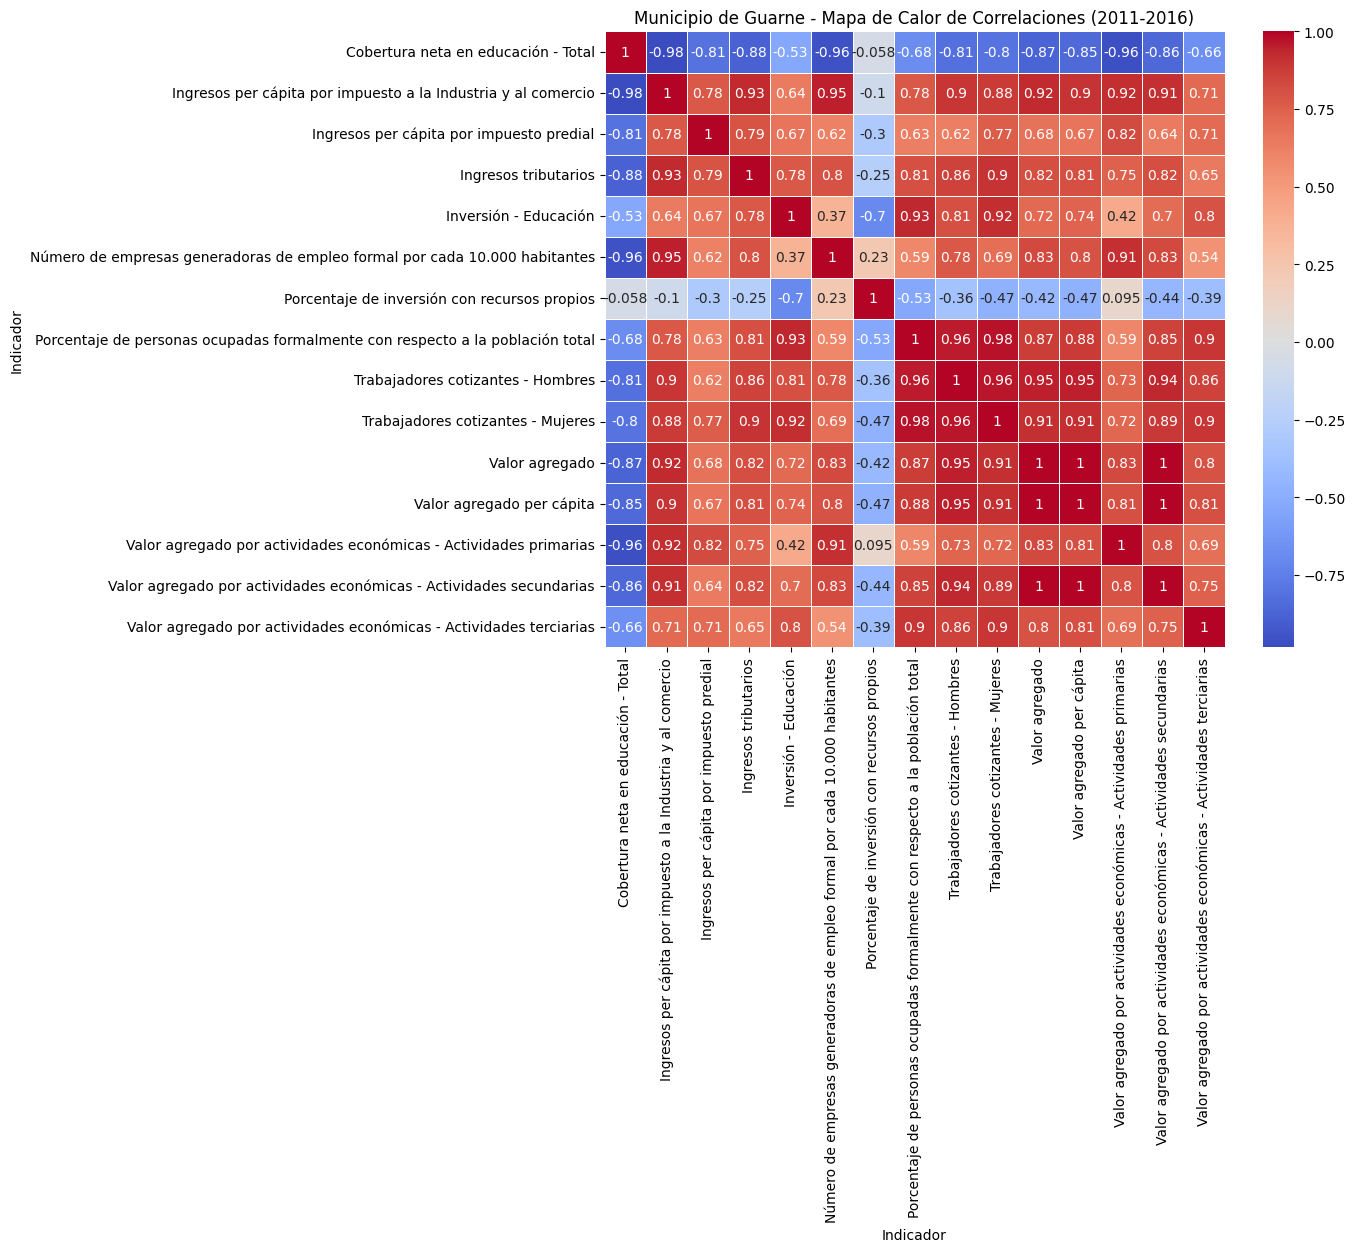

In [ ]:
# prompt: # Plot a correlation heat map with df_conc

import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for the years 2011 to 2016
filtered_df_conc = df_conc[(df_conc['Año'] >= pd.to_datetime(2011, format='%Y')) & (df_conc['Año'] <= pd.to_datetime(2016, format='%Y'))]

# Pivot the DataFrame
pivot_df = filtered_df_conc.pivot(index='Año', columns='Indicador', values='Dato Numérico')

# Calculate the correlation matrix
correlation_matrix = pivot_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Municipio de Guarne - Mapa de Calor de Correlaciones (2011-2016)')
plt.show()
